In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import sys
from IPython.display import HTML
from matplotlib import pyplot as plt
from celluloid import Camera
import plotly.graph_objects as go

import networkx as nx

from IPython.display import HTML
from matplotlib import pyplot as plt
from celluloid import Camera
import collections


import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
import ast
from random import shuffle

In [2]:
emails_df = pd.read_csv('Data/emails_tokenized.csv')
employee_df = pd.read_csv('Data/employees.csv')
network_df = pd.read_csv('Data/network.csv')

In [3]:
print(len(emails_df))

87230


In [4]:
print(len(network_df))

21254


In [5]:
exec_list = ['CEO','President','Vice President']

In [6]:
emails_df = emails_df[~emails_df['token_subject'].isna()]

exec_list = ['CEO','President','Vice President']

job_count = collections.Counter()
for rank in emails_df['sender_level']:
    job_count[rank] +=1



In [7]:
emails_df['cleaned_body'] = [str(x) for x in emails_df['cleaned_body']]
word_mask = ['fuck' in email for email in emails_df['cleaned_body']]

word_emails_df = emails_df[word_mask]

new_mids = list(word_emails_df['mid'])
network_mask = [str(x) in new_mids for x in list(network_df['mid'])]

network_df = network_df[network_mask]

In [8]:
print(len(emails_df))
print(len(network_df))

87011
39


In [9]:
len(new_mids)

152

In [10]:
emails_df.head()

,Unnamed: 0,mid,sender,date,message_id,subject,body,folder,cleaned_body,cleaned_subject,sender_level,token_body,token_subject
0,24,76,mary.hain@enron.com,2000-08-17 07:11:00,<5722839.1075863606028.JavaMail.evans@thyme>,Enron s transmission/power exchange model for ...,---------------------- Forwarded by Mary Hain/...,Robert_Badeer_Aug2000Notes FoldersNotes inbox,enron s transmission/power exchange model for...,enron s transmission/power exchange model for ...,NaN,"[['enron', 'transmission/power', 'exchange', '...","['enron', 'transmission/power', 'exchange', 'm..."
1,41,93,cooper.richey@enron.com,2000-08-23 04:39:00,<4083763.1075863605647.JavaMail.evans@thyme>,Change to EnData,The Fundamentals Group is moving Database serv...,Robert_Badeer_Aug2000Notes FoldersNotes inbox,the fundamentals group is moving database serv...,change to endata,Manager,"[['fundamentals', 'group', 'moving', 'database...","['change', 'endata']"
2,107,159,mary.hain@enron.com,2000-08-29 06:28:00,<14457348.1075863603979.JavaMail.evans@thyme>,ISO To Participate in Super Peak Market,FYI---------------------- Forwarded by Mary Ha...,Robert_Badeer_Aug2000Notes FoldersNotes inbox,"iso to participate in super peak marketfolks,...",iso to participate in super peak et,NaN,"[['iso', 'participate', 'super', 'peak', 'mark...","['iso', 'participate', 'super', 'peak', 'et']"
3,137,465,jeff.dasovich@enron.com,2000-08-07 12:23:00,<769016.1075863596202.JavaMail.evans@thyme>,CalPX Market Compliance Unit Submits its 2nd A...,FYI. The report posted on the website fails t...,Robert_Badeer_Aug2000Notes FoldersCapx,calpx market compliance unit submits its 2nd ...,calpx et compliance unit submits its 2nd annu...,Employee,"[['calpx', 'market', 'compliance', 'unit', 'su...","['calpx', 'et', 'compliance', 'unit', 'submits..."
4,189,517,jeff.dasovich@enron.com,2000-08-10 03:12:00,<28494229.1075863594884.JavaMail.evans@thyme>,Re: Governor s Press Conference -- Shot Across...,There appears to be a pattern forming. The ad...,Robert_Badeer_Aug2000Notes FoldersCalifornia,governor s press conference -- shot across th...,re: governor s press conference -- shot across...,Employee,"[['governor', 'press', 'conference', '--', 'sh...","['governor', 'press', 'conference', '--', 'sho..."


In [11]:
stems = []

emails_df['token_subject']= [ast.literal_eval(x) for x in emails_df['token_subject']]
subjects = []
for email in emails_df['token_subject']:
    for stem in stems:
        while stem in email:
            email.remove(stem)
    if email == []:
        email = ['nothing']
    
    print(email)
    subjects.append(email)
emails_df['token_subject'] = subjects

['enron', 'transmission/power', 'exchange', 'model', 'discussion']
['change', 'endata']
['iso', 'participate', 'super', 'peak', 'et']
['calpx', 'et', 'compliance', 'unit', 'submits', '2nd', 'annual', 'report', 'ferc']
['governor', 'press', 'conference', '--', 'shot', 'across', 'bow']
['ca', 'iso', 'cal', 'px', 'information', 'related', '2000', 'et', 'activity']
['sdg', 'e', 'offer']
['critics', 'seek', 'control', 'iso']
['deregulation', 'conspiracy', 'incompetence', 'even', 'energy', 'prices', 'manipulated', 'illegal', 'gov', 'calls', 'cut', 'electricity']
['iso', 'special', '8.10.00', 'report', 'energy', 'et', 'issues', 'performance', '-june', '2000']
['usbs', 'painewebber']
['hello', 'long', 'lost', 'friend']
['whats']
['expense', 'receipts']
['badge']
['badge']
['badge', 'access']
['confidential', 'calif', 'pea', 'plant']
['tw', 'gomez', 'lateral', 'offer', 'memo']
['potential', 'sale', 'gomez', 'lateral', 'pipe']
['revised-', 'confidential', 'phoenix', 'az', 'gas', 'et', 'research'

['nothing']
['nothing']
['nothing']
['nothing']
['kerrville']
['nothing']
['comanch', 'trace', 'home']
['fw']
['fw']
['fw', 'wildflower', 'rayburn', 'emilie', 'apts']
['nothing']
['fw', 'curve', 'shift', 'file']
['attention', 'body', 'shop', 'members', '--', 'update', 'body', 'shop', 'closure']
['west', 'position']
['fw']
['fw', 'mid', 'c', 'new', 'deals', 'sept', '24']
['west', 'position']
['fw', 'west', 'position']
['fw', 'report']
['nothing']
['nothing']
['fw', 'charts']
['fw', 'charts']
['fw', 'charts']
['nothing']
['please']
['fw', 'please']
['fw', 'regatta', 'sea', 'breeze', 'harvard', 'place', 'apartments', 'austin', 'tx']
['nothing']
['nothing']
['fw', 'zero', 'option']
['answer']
['nothing']
['trv', 'notification', 'west', 'var', '11/26/2001']
['dec', 'physical']
['fw', 'pre-bid', 'meeting']
['p', 'l', 'estimates']
['trv', 'notification', 'west', 'ng', 'prices', 'basis', '11/21/2001']
['desk', 'desk', 'deals']
['pg', 'e', 'transport']
['ops', 'meeting']
['fw', 'sum', '.xls']
[

['new', 'fax', 'received', 'likely', 'sender', '0354498794']
['aps']
['permanent', 'employment']
['june', '12', 'hr', 'leadership', 'team', 'meeting']
['ecc', 'double', 'breasted', 'checklist']
['jeremy', 'morris']
['jeremy', 'morris']
['shift', 'differentials', 'overtime', 'payment']
['shift', 'differentials', 'overtime', 'payment']
['insurance']
['subpoena', 'served', 'enron', 'corp.', 'june', '6', '2000']
['clonch', 'lawsuit']
['reply']
['ray', 'le', 'pellum']
['important', 'prc', 'committee', 'conference']
['follow']
['nextlaw']
['green', 'card']
['right']
['company', 'structure', 'file']
['austin', 'information']
['eip']
['test']
['hr', 'on-line', 'logon', 'screen']
['haile', 'motion', 'nonsuit']
['trust', 'issue', 'executive', 'service', 'agreement', 'meeting']
['question']
['enron', 'korea', 'secondment', 'agreement']
['contingency', 'firm', 'agreement']
['golden']
['newsprint', 'acquisition']
['staffing']
['revisions', 'barbara', 'paige', 'employment', 'agreemet']
['new', 'vend

['big', 'delivery', 'point', 'const', 'oper', 'agreement']
['rescheduled', 'appreciation', 'luncheon', 'ets', 'tw', 'teams']
['atoka', 'cost']
['fw', 'cus', 'er', 'contacts']
['fw', 'mavrix', 'phone', 'gadd', 'office']
['fw', 'mavrix', 'phone', 'gadd', 'office']
['fw', 'gray', 'interconnect']
['october', '1st', 'contract', 'status', 'september', '18th']
['fw', 'tw', 'california', 'deliveries', 'ferc', 'report']
['fw', 'clauses', 'add', 'contract']
['time', 'reports', 'due']
['gray', 'interconnect']
['fw', 'fw']
['ern', 'trails']
['cliffs', 'trailer', 'park', 'area', 'gas', 'request']
['fw', 'demo', 'tw', 'deal', 'profitability/analysis', 'model']
['tw', 'daily', 'balance', '09/17/2001']
['fw', 'morning', 'call', 'meeting']
['italy']
['fw', 'ern', 'trails']
['move']
['fw', 'pemex', 'gas', 'letter', 'draft']
['fw', 'pemex', 'gas', 'letter', 'draft']
['move']
['fw', 'password', 'access', 'tw', 'deal', 'profitability/analysis']
['nothing']
['fw', 'tw', 'imbalance', 'mtg']
['tape']
['bullet

['fyi', 'pge', 'default', 'warnings', 'issued']
['western', 'resources']
['three-way', 'trade', 'analysis']
['pge']
['pge']
['voice', 'mail']
['pge', 'trade']
['tolling', 'deal']
['pge', 'assignment', 'morgan']
['hypotheticals']
['three-way', 'trade']
['three-way', 'trade']
['calorie', 'burning', 'drill']
['thanks']
['meeting']
['nothing']
['tennis']
['tennis']
['pg', 'e', 'guarantee/enron', 'energy']
['sd', 'warren', 're-draft']
['shari', 'relocation']
['saturday']
['fw', 'pg', 'e', 'guaranty/enron', 'energy']
['saturday']
['saturday']
['nothing']
['tennis']
['chart', 'power', 'risk', 'areas']
['city', 'memphis']
['conference', 'call']
['katz', 'eei', 'article']
['address']
['isda', 'energy', 'conference']
['cdn', 'eei']
['lih']
['lih']
['becnel', 'bruce', 'reemsnyder']
['hi']
['becnel', 'bruce', 'reemsnyder']
['fw', 'optout', 'language']
['nothing']
['midam', 'sales', 'tariff']
['tva', 'documents']
['accomplishments']
['sam', 'birthday']
['plans']
['sam', 'birthday']
['draft', 'legal

['merced']
['imperial', 'irrigation', 'district']
['fw', 'palo', 'alto', 'invoice']
['july', 'fixed', 'purchases']
['fw', 'request', 'electricity', 'proposal']
['balloon', 'fiesta']
['fw', 'request', 'electricity', 'proposal']
['nothing']
['nothing']
['hey']
['3rd', 'quarter', '2002', 'year', '2002']
['pnm', 'call']
['3rd', 'quarter', '2002', 'year', '2002']
['fw', '3rd', 'quarter', '2002', 'year', '2002']
['las', 'cruces']
['rfp', 'qualifications']
['citizens']
['nothing']
['nothing']
['citizens/', 'spreadsheet']
['nothing']
['nothing']
['nothing']
['info']
['fw']
['visit']
['nothing']
['nothing']
['nothing']
['nothing']
['noresco', 'credit', 'contact']
['fw', 'city', 'glendale']
['enron', 'west', 'gas', 'pricing', 'sheet']
['noresco', 'credit', 'contact']
['noresco', 'credit', 'contact']
['fw', 'noresco', 'credit', 'contact']
['noresco']
['noresco']
['fw', 'city', 'glendale']
['nomination', 'september']
['gotten', 'order', 'yet']
['noresco']
['price', 'indications']
['city', 'santa',

['nothing']
['nothing']
['nothing']
['u', 'later']
['fw', 'enron', 'mentions']
['c4', 'trade']
['nothing']
['nothing']
['ena', 'external', 'interviews']
['fw', 'natural', 'update']
['nothing']
['nothing']
['ene']
['apology']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['discussion', 'time']
['fw', 'neural', 'networks']
['nothing']
['pira', 'gas', 'survey']
['pros', 'revenue', 'mgmt']
['et']
['nothing']
['neural', 'networks']
['nothing']
['nothing']
['pira']
['nothing']
['marc', 'findsen']
['nothing']
['want', 'two', 'dollars']
['want', 'two', 'dollars']
['nothing']
['want', 'two', 'dollars']
['nothing']
['wednesday']
['nothing']
['like', 'stew']
['yahoo', 'ge', 'lighting', 'launches', 'national', 'energy', 'program', '...', 'commits', 'major', 'p', 'u']
['fw']
['new', 'power']
['nothing']
['pira']
['nothing']
['telephone', 'interviews', 'trading', 'track']
['fw', 'fw', 'warning']
['fw', 'pira']
['fw', 'warning']
['nothing']
['pira']
['nothing']
['neural', 'networks']
['

['us', 'gas', 'phy', 'index', 'approval', 'required']
['mieco', 'inc']
['eol', 'credit', 'responses', '10/24/00']
['e/p', 'mix', 'physical', 'financial', 'approval', 'needed']
['us', 'gas', 'phy', 'index', 'approval', 'required']
['enrononline', 'public', 'report', 'october', '20', '2000']
['nda-webmethods', 'inc']
['counterparty', 'approval', 'list', '10/23/00']
['eol', 'credit', 'responses', '10/24/00']
['eol', 'credit', 'responses', '10/24/00']
['ecc/duke', 'energy', 'eting', 'limited', 'partnership', 'master']
['xuma', 'nda']
['eol', 'credit', 'responses', '10/23/00']
['confidentiality', 'agreement', 'list']
['i2', 'technologies']
['shell', 'coal', 'eting']
['i2', 'technologies']
['idemitsu', 'kosan', 'co', 'ltd']
['idemitsu', 'kosan', 'co', 'ltd']
['idemitsu', 'kosan', 'co', 'ltd']
['eol', 'credit', 'responses', '10/23/00']
['eol', 'steel', 'launch']
['update', 'emerson']
['avista', 'energy-isda']
['ice', 'participation', 'agreement']
['update', 'emerson']
['eol', 'credit', 'respo

['june', 'first', 'month', 'prices']
['june', 'first', 'month', 'prices']
['fwd', 'hey', 'girlfriends']
['fwd', 'hey', 'girlfriends']
['hi', 'girls', '...']
['tmas', 'dinner']
['annuity', 'qg1453']
['newco', 'name']
['el', 'paso', 'info']
['deferral', 'election', 'form']
['newco', 'names']
['newco', 'names']
['all-party', 'meeting', 'notice', 'cmr', 'duque', '12/12/00', 'i.99-07-003']
['bullet']
['bullets']
['bullets']
['super', 'saturday', 'dinner']
['fw', 'sledding']
['tw', 'options', 'technical', 'conference']
['newco']
['ets', 'newco']
['behavioral', 'profile', 'risk', 'management', 'personnel']
['calif.', 'performance', 'issues']
['dinner']
['tw']
['tw', 'et', 'based', 'rates']
['p.s']
['sid', 'son']
['message']
['max', 'rate', 'issue', 'tw']
['gir', 'pd']
['gir', 'pd']
['proposed', 'decision']
['24th', 'iaee', 'international', 'conference']
['tmas', 'coming']
['24th', 'iaee', 'international', 'conference']
['misc']
['utilities', '815', '1/2', 'cortlandt']
['apt']
['24th', 'iaee',

['changes', 'letter', 'agreement']
['lv', 'co', 'gen', 'next', 'generation', '...', 'hey', 'pun']
['tripp', 'proposed', 'terms', 'engagement']
['lv', 'co', 'gen', 'next', 'generation', '...', 'hey', 'pun']
['tripp', 'proposed', 'terms', 'engagement']
['please', 'hold']
['tripp', 'proposed', 'terms', 'engagement']
['tripp', 'proposed', 'terms', 'engagement']
['weekend']
['lake', 'austin', 'spa', 'resort']
['panda/delta/party', 'x']
['vepco/old', 'business']
['nothing']
['panda', 'letter', 'agreement']
['nothing']
['ge', 'meeting', 'friday']
['tripp', 'proposed', 'terms', 'engagement']
['tripp', 'proposed', 'terms', 'engagement']
['ge', 'meeting', 'friday']
['njr', 'loi']
['njr', 'loi']
['enron', 'wholesale', 'services', 'legal', 'department']
['escalade']
['panda', 'delta', 'documents']
['escalade']
['credit', 'union', 'rates']
['fw', 'enron', 'meeting', 'training', 'scope']
['lv', 'cogen/ge', 'agreement']
['ge', 'meeting', 'friday']
['blue', 'dog', 'amended', 'llc']
['turbines']
['lm60

['nothing']
['fw', 'discussions']
['nothing']
['nothing']
['nothing']
['fw']
['nothing']
['nothing']
['nothing']
['west', 'positions']
['nothing']
['nothing']
['enron']
['fw', 'focus', 'group', 'survey', 'results']
['fw', 'natural', 'gas', 'origination']
['storage', 'data']
['nothing']
['todays', 'trades']
['trades']
['resume']
['resume']
['nothing']
['power', 'desk', 'gas', 'update']
['fw', 'cus', 'er', 'positions']
['nothing']
['nothing']
['run']
['txu', 'trading']
['mtg', 'regarding', 'index', 'postings']
['thanks']
['net', 'change', '1:00', 'p.m']
['contact', 'numbers', 'weekend']
['operations/it', 'contacts', 'weekend']
['nothing']
['fw', 'stats']
['fw', 'reminder', 'interivews', 'thursday', 'trading', 'track']
['joyce']
['nov', 'nymex']
['budget', 'mtg', '10/30', '11:00', 'a.m.', 'eb32c2']
['greenberg', 'v.', 'belfer', 'et', 'al']
['fw', '2002', 'plan', 'schedule']
['fw']
['fw', 'longview', 'dash', 'request']
['fw']
['fw', 'contract', 'sale', 'idea']
['vmac', 'transaction']
['not

['hunting']
['drudge', '--', 'drudge', 'report', '2000c']
['drudge', '--', 'drudge', 'report', '2000c']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['golf']
['nothing']
['golf']
['nothing']
['golf']
['nothing']
['problem']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['534513']
['nothing']
['b-day']
['b-day']
['b-day']
['hi']
['nothing']
['nothing']
['nothing']
['updated', 'socal', 'forecast']
['nothing']
['nothing']
['nothing']
['hi']
['nothing']
['nothing']
['nothing']
['fwd', 'funny', 'commercials']
['nothing']
['flag', 'football']
['nothing']
['nothing']
['nothing']
['nothing']
['hi']
['pricing', 'dec', '2000', 'purchase', 'pg', 'e']
['fw', 'alcohol', 'attributes']
['pricing', 'dec', '2000', 'purchase', 'pg', 'e']
['nothing']
['new', 'generation', 'report', 'december', '1999']
['nothing']
['fw', 'fw', 'scary']
['nothing']
['nothing']
['nothing']
['pricing', 'dec', '2000', 'purchase', 'pg', 'e']
['address']
['rudy', 'rudy', 'rudy']
['nothin

['next', 'meeting', 'brokerage', 'accounts']
['csi']
['fina', 'ation', 'execution', 'ena/eweb', 'documentation']
['csi']
['ubs', 'ag']
['fina', 'ation', 'execution', 'ena/eweb', 'documentation']
['corrugated', 'services', 'inc']
['bond', 'counsel', 'opinion']
['eweb', 'mac']
['eugene', 'water', 'electric', 'board', 'confirmations', 'swap', 'nos', '447459.04', '.02']
['financial', 'confirmation', 'letter-eweb']
['reminder', '--', 'office']
['confirmation']
['bear', 'stearns', 'co.', 'international', 'limited', 'enron', 'corp']
['crescendo', 'energy', 'llc']
['eweb-enron', 'conference', 'call']
['jury', 'duty']
['eweb-enron', 'conference', 'call']
['new', 'draft', 'trade', 'confirmation']
['confirmation']
['bear', 'stearns']
['confirmation']
['revised', 'isda', 'schedule']
['new', 'draft', 'contract', 'equity', 'restructu']
['new', 'draft', 'contract', 'equity', 'restructu']
['bear', 'stearns']
['rbc', 'swap', 'amendment']
['rbc', 'commodity', 'swap']
['latest', 'versions', 'confirmation

['need', 'rutherford', 'consulting', 'complete']
['mortgage']
['fw', 'egs', 'acctg/finance', 'issues', 'mtg']
['eott/egp', 'fuels', 'sec', 'data', 'responses']
['nothing']
['egs', 'acctg/finance', 'issues', 'mtg']
['fw', 'moving', 'tonight']
['fw', 'cost', 'center']
['a/r', 'securitization']
['fw']
['nothing']
['mortgage']
['fw', 'ets', 'investor', 'questions']
['fw', 'ets', 'investor', 'questions']
['need', 'rutherford', 'consulting', 'complete']
['fw', 'nepco']
['j.centilli', 'rates', 'struc', 'sun', 'devil']
['issues', 'meeting']
['important', 'social', 'environmental', 'risk', 'baseline']
['cunningham']
['cunningham']
['need', 'rutherford', 'consulting', 'complete']
['fw', 'important', 'social', 'environmental', 'risk', 'baseline']
['ipayit', 'enhancement', 'review', 'committee']
['2002', 'plan', 'review', 'run']
['2002', 'plan', 'review', 'run']
['cunningham']
['fw', 'eas', 'structure', 'meeting', 'cancelled', 'rescheduled']
['fw', 'quick', 'note']
['fw', 'egp', 'fuels', 'strawman

['nothing']
['meeting', 'brown']
['meeting', 'brown']
['angelides', 'says', 'bonds', 'issued', '2002']
['deck', 'project']
['socalgas', 'bcap']
['socalgas', 'bcap']
['risks']
['nothing']
['risks']
['risks']
['risks']
['nothing']
['golf', 'fees']
['nothing']
['nothing']
['fw', 'draft', 'request', 'rehea', '--', 'killing', 'da']
['draft', 'request', 'rehea']
['ferc', 'examine', 'alleged', 'et', 'manipulation', 'calif', 'iso', 'ferc', 'meeting', 'california', 'monday', 'csfb', 'pcg', 'proposal']
['iso/ferc', 'meeting']
['calpine', 'contact']
['golf', 'fees']
['fw', 'dissent', 'commissioners', 'bilas', 'duque', 'opposing', 'suspension', 'da']
['ferc', 'examine', 'alleged', 'et', 'manipulation', 'calif', 'iso', 'ferc', 'meeting', 'california', 'monday', 'csfb', 'pcg', 'proposal']
['dissent', 'commissioners', 'bilas', 'duque', 'opposing', 'suspension', 'da']
['fw', 'elec', 'daily', 'pg', 'e', 'reorganization']
['dissent', 'commissioners', 'bilas', 'duque', 'opposing', 'suspension', 'da']
['f

['gas', 'restructu', 'activities']
['energy', 'efficiency', 'etc', 'incentives']
['lunch']
['final', 'report', 'cal', 'px', 'summer', 'prices']
['siting', 'slide']
['driving']
['pg', 'e', 'rate', 'design', 'update']
['west', 'point', 'inn', 'december', '9th']
['tal', 'points', 'dave', 'parquet']
['fwd', 'cmua', 'et', 'reform', 'proposal']
['pr', 'op']
['good', 'news', '--', 'twice']
['retreat', 'reminder']
['test']
['last', 'call', 'schedules']
['nothing']
['nothing']
['case', '3,4']
['coffee', 'rebecca']
['fw', 'enron', 'proposals', 'regarding', 'document', 'subpoenas']
['final', 'report', 'cal', 'px', 'summer', 'prices']
['retreat']
['nothing']
['auction', 'slides']
['fw', 'enron', 'proposals', 'regarding', 'document', 'subpoenas']
['rebecca']
['nothing']
['case', '3,4']
['nov.', '13', 'uc', 'summit', 'conference', 'electricity']
['case', '3,4']
['nothing']
['case']
['case']
['case']
['case']
['competition', 'pr', 'strategy', 'update']
['et', 'intelligence', 'usi', 'corporation', 'he

['exhibit', 'b', '--', 'nom', 'form']
['nothing']
['smo', '/non-smo', 'rooms']
['ena', 'phase', 'v', 'agreements']
['camping']
['insurance', 'requirements']
['ii', 'lease', 'gillette', 'premises']
['mtg', 'exhibits']
['interconnect', 'agreements']
['screw', 'compressor', 'site', 'lease']
['revised', 'compressor', 'site', 'lease', 'agreement']
['gallup', 'revisions']
['black', 'hills', 'lease', 'doc']
['gallup']
['double', 'cross', '...', '...', 'kill']
['indemnity', 'agreement']
['spanish', 'camp', 'mobil', 'vanderbuilt', '14-inch', 'interconnect']
['mtg', 'right', 'match', 'letter', 'agreement']
['spanish', 'camp', 'mobil', 'vanderbuilt', '14-inch', 'interconnect']
['celanese', 'bayport']
['revised', 'black', 'hills']
['future']
['right', 'way', 'services', 'agreement', '-reply']
['mtg', 'docs']
['le', 'hace']
['le', 'hace']
['lease', 'agreement']
['right', 'way', 'services', 'agreement']
['blanket', 'authorization', 'follow-up']
['campaigner', 'training']
['gallup', 'compression', 'a

['tug', 'fork']
['dynegy', 'eting', 'trade']
['city', 'cartersville']
['energy']
['hello']
['confirmation']
['gisb']
['gisb']
['election', 'party']
['gisb', 'contract']
['wisconsin', 'public', 'service', 'corporation']
['dicks', 'well', 'service']
['gisb']
['heartland']
['gisb']
['response', 'hpl', 'requested', 'changes']
['name', 'change', 'notification']
['nothing']
['nothing']
['nothing']
['vacation', 'days']
['election', 'party']
['tug', 'fork']
['replacement']
['replacement']
['election', 'party']
['wg', 'shaner']
['election', 'party']
['mxenergy']
['master', 'firm', 'request']
['nothing']
['heartland']
['master', 'firm', 'requesnt']
['heartland']
['gisb', 'appendix', 'doc', 'revised']
['select', 'energy', 'inc']
['cartersville', 'gas']
['per', 'conversation', 'morning', '...']
['nothing']
['dick', 'well', 'service']
['wisconsin', 'public']
['dick', 'well', 'service']
['mxenergy']
['mxenergy']
['mxenergy']
['nothing']
['wisconsin', 'agreement']
['app', 'confirms', 'agreements']
['

['nothing']
['questons', 'authur', 'anderson']
['request', 'submitted', 'access', 'request', 'samantha.law', 'enron.com']
['brazilian', 'curve']
['fw']
['fw', 'request', 'submitted', 'access', 'request', 'samantha.law', 'enron.com']
['october', 'reserve', 'addition', 'direct', '802844']
['questions', 'aa']
['new', 'albany', 'loss']
['filling', 'vacancies', 'adding', 'head', 'count']
['trading', 'track', 'portfolios']
['fw', '30th', 'birthday']
['fw', 'new', 'instrument', 'type', 'code', 'enpower']
['new', 'albany', 'loss']
['new', 'albany', 'loss']
['new', 'instrument', 'type', 'code', 'enpower']
['west', 'deals']
['pge']
['oct', '11', 'ice', 'transactions']
['east', 'volume', 'analysis']
['new', 'instrument', 'type', 'code', 'enpower']
['inactivate', 'book']
['volatility']
['west', 'schedule', 'c']
['schedule', 'c', 'question']
['west', 'power', 'curve', 'shape']
['fw', 'enron', 'center', 'testing']
['today', 'meeting']
['gift']
['fw', '10/15/01', 'ea', 'position', 'report']
['fw', 's

['fw']
['journey', 'rocks']
['journey', 'rocks']
['nothing']
['chips', 'margaritas']
['nothing']
['fantasy', 'football']
['nothing']
['house']
['nymex', 'bid']
['ca', 'flights']
['chips', 'margaritas']
['call', 'michele', 'chance', 'grandma']
['nothing']
['bid', 'table']
['mornin', 'info']
['nothing']
['nothing']
['nothing']
['golf', 'sunday']
['nothing']
['bear', 'creek', 'golf', 'world']
['nothing']
['nothing']
['united', 'way', 'website']
['nothing']
['fantasy', 'football']
['fantasy', 'football']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['fantasy', 'football']
['nothing']
['fantasy', 'football']
['fantasy', 'football']
['unsubscribe']
['nothing']
['options']
['nothing']
['golf']
['nothing']
['nothing']
['question']
['kobra-book']
['kobra-book']
['kobra-book']
['kobra-book']
['golf']
['furniture']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['jackie']
['kobra-book']
['vegas']
['vegas']
['nothing']
['el', 'golf']
['nothing']


['pg', 'e', 'energy', 'trading']
['fw', 'intelligence', 'test']
['fw', 'elm', 'finance', 'course', 'offe']
['fw']
['amu', 'student']
['site', 'blocked']
['site', 'blocked']
['email', 'dr.', 'leerburger']
['ravi', 'thuraisingham']
['ravi', 'thuraisingham']
['ravi', 'thuraisingham']
['ready', 'approval']
['extension', 'request', 'l']
['amu', 'student']
['straddle', 'problem']
['straddle', 'problem']
['amu', 'student']
['peaker', 'price', 'ngi', 'chicago', 'feb']
['offer', 'gas', 'daily', 'option', 'waha', 'perm']
['extension-lawrence']
['fw', 'lawyers']
['gfi']
['fw', 'noweaks', 'achs']
['fw', 'hilarious', 'photos']
['pg', 'e', 'energy', 'trading']
['houston', 'ballet', 'miller', 'theater', 'performance', 'coppelia']
['gas', 'daily', 'options']
['gas', 'daily', 'options']
['two', 'states', 'model', 'power']
['vol', 'skew']
['fw', 'clintonpez.jpg']
['cave']
['nothing']
['fw']
['fw', 'option', 'quotes']
['vol', 'skew']
['hello']
['lawrence']
['lawrence']
['hello']
['waiting', 'reply', '-st

['fw', 'e-mail', 'retention']
['fw', 'ation', 'fbi']
['nothing']
['fw', 'laptop']
['fw', 'fw', 'research', 'library']
['fw', 'ceraweek']
['fw', 'fw', 'research', 'library']
['nothing']
['fw', 'kindall']
['fw', 'research', 'library']
['fw', 'laptop']
['fw', 'fbi', 'investigation']
['fw', 'mscf']
['fw', 'eia', 'disp', 'draft', 'new', 'storage', 'survey', 'gasmart/power', '2002']
['http', '//energycommerce.house.gov/107/pubs/andersenmemos.pdf']
['fw', 'reference', 'request', 'regarding', 'w', 'cope', 's05371/r966']
['fw', 'jgsadj', 'enron', 'meltdown', 'lecture']
['fw', 'reference', 'request', 'regarding', 'w', 'cope', 's05371/r966']
['fw', 'gpcm', 'news', '1/25/02', 'wor', 'power', 'model', 'forecasts', 'aga', 'gas', 'storage']
['fw', 'yang', 'info']
['issues', 'exotica', 'library']
['issues', 'exotica', 'library']
['weather', 'model']
['fw', 'research', 'information']
['fw', 'biliana']
['advice']
['fw', 'issues', 'exotica', 'library']
['fw', 'issues', 'exotica', 'library']
['rice', 'exe

['fw', 'dominion']
['prepays', 'reliant', 'dominion']
['contacts']
['fw', 'contacts']
['gas', 'flow', 'prepayment', 'schedule', '3/28/02']
['fw', 'reliant', 'wire', 'confirmation']
['transwestern', 'k', '24924', 'capacity', 'release', 'revenue', 'sha', 'january', '11-31']
['questions', 'need', 'dominion', 'answer']
['nothing']
['questions', 'need', 'dominion', 'answer']
['fw', 'retention', 'severance', 'plan']
['questions', 'need', 'dominion', 'answer']
['fw', 'action', 'requested', 'past', 'due', 'invoice', 'user']
['yo']
['letter', 'unpaid', 'invoice', 'post', 'petition', 'deliveries']
['fw', 'cornerstone', 'midam']
['gas', 'flow', 'prepayment', 'schedule', '4/2/02']
['backup']
['enron', 'compressor', 'services']
['wor', 'group', 'list']
['april', 'deal']
['gas', 'flow', 'prepayment', 'schedule', '4/2/02']
['april', 'deal']
['ppep', 'invoicing']
['test']
['april', 'deal']
['base', 'contract', 'short-term']
['fw', 'contact', 'information']
['moving']
['4-3-02', 'gas', '.xls']
['lone',

['meeting', 'viviance', '10']
['vanessa', 'schulte']
['eol']
['fw', 'eol']
['enron', 'net', 'works', 'e', 'policy', 'best', 'travel', 'practices']
['organization', 'announcement']
['preliminary', 'schedule', 'attendee', 'list', 'mid', 'year', 'prc', 'meeting']
['fw', 'headcount', '1998', '2001']
['fw', 'confirmlogic', 'certification']
['fw']
['fw', '426370', 'srf', 'brent', 'priice', 'urgent', 'request']
['industrial', 'ets']
['fw', 'industrial', 'ets']
['various', 'responses']
['summer', 'interns']
['operations', 'prc', 'meeting']
['new', 'rc', 'calgary', 'risk']
['erequest']
['good', 'news']
['operations', 'prc', 'meeting']
['energy', 'operations', 'prc']
['good', 'morning']
['director', 'impact', 'influence']
['fw', 'additional', 'new', 'works', 'floor', 'meeting', '37th', 'floor', '2nd']
['teambuilding', 'commdoditylogic']
['lunch']
['fw', 'sto', 'data', 'enrononline']
['elimination', 'confirmations', 'eol', 'transactions']
['fw', 'operational', 'issues']
['calendars', 'march', '30

['fwd', 'football', 'season', '...', '..this', 'one', 'terrible', 'nonetheless', 'funny', 'gig', 'em', 'aggies']
['agua', 'dulce', 'thompsonville', 'p', 'ucts']
['fw', 'big', '12', 'overview']
['agua', 'dulce', 'thompsonville', 'p', 'ucts']
['agua', 'dulce', 'thompsonville', 'p', 'ucts']
['come', 'celebrate', 'brian', 'hoskins', 'birthday']
['nothing']
['dues']
['two-rows', 'mnf']
['game', '7', 'wednesday']
['hall', 'e-card', 'mom']
['flag', 'football', 'schedule']
['nothing']
['dallas']
['fantasy', 'football']
['dallas']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['game', '7:00', 'wed']
['game']
['nothing']
['game', '7:00', 'wed']
['game', 'tonight', '7:00']
['game', '7:00', 'wed']
['fw', 'mon', 'fire']
['nothing']
['bb', 'game']
['nothing']
['nothing']
['nothing']
['new', 'orleans']
['inside', 'ut', 'football', 'september', '28', '2000']
['nothing']
['fw', 'teasingcat.mpg', '2.mpeg']
['pick', 'ups']
['brian', 'b-day']
['brian', 'b-day']
['nothing']
['juvenile', 'diab

In [12]:
total_count = 0
for em in emails_df['body']:
    total_count+=em.count('lovely')
total_count

91

In [13]:
emails_df['token_body']= [ast.literal_eval(x) for x in emails_df['token_body']]
subjects = []
for email in emails_df['token_body']:
    sents = []
    for sent in email:
        for stem in stems:
            while stem in sent:
                sent.remove(stem)
                
        sents.append(email)
    subjects.append(sents)
emails_df['token_body'] = subjects

In [14]:
subject_tokens = list(emails_df['token_subject']) 

In [15]:
exec_email_df = emails_df[[x in exec_list for x in emails_df['sender_level']]]
employee_email_df = emails_df[emails_df['sender_level']=='Employee']

exec_subjects = list(exec_email_df['token_subject'])
employee_subjects =list(employee_email_df['token_subject'])
total_subjects = list(employee_email_df['token_subject'])+list(exec_email_df['token_subject'])
total_jobs = list(employee_email_df['sender_level'])+list(exec_email_df['sender_level'])

In [16]:
sum(['fw' in x for x in employee_subjects])/len(employee_subjects)

0.09629130141604855

In [17]:
sum(['fw' in x for x in exec_subjects])/len(exec_subjects)

0.19446574196696173

In [18]:
X = total_subjects
new_X = []
for x in X:
    str_x = ''
    for item in x:
        str_x = str_x + ' ' + item
    new_X.append(str_x)
X = new_X
y = total_jobs
y=[x in exec_list for x in y] 

In [19]:
X

[' calpx et compliance unit submits 2nd annual report ferc',
 ' governor press conference -- shot across bow',
 ' ca iso cal px information related 2000 et activity',
 ' critics seek control iso',
 ' deregulation conspiracy incompetence even energy prices manipulated illegal gov calls cut electricity',
 ' iso special 8.10.00 report energy et issues performance -june 2000',
 ' st confidentiality agreement',
 ' ameramex bloomfield energy farm project trigon-sheehan information request',
 ' red lake storage project',
 ' wspp 4th quarter 2000 report',
 ' ferc doe 4th quarter reports',
 ' ferc doe 4th quarter reports',
 ' fwd california march 9 order addressing refunds jan. 2001 sales',
 ' wacm transmission losses',
 ' confirming already knew',
 ' iep ferc/iso draft iep ferc cmts staff report',
 ' ridgewood petition released qf contracts',
 ' fyi px sues iso',
 ' esc rto',
 ' nothing',
 ' capacity subscription strategy',
 ' cal throughput.xls',
 ' california proposed projects',
 ' spreadshe

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


sentences_train, sentences_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

vectorizer = CountVectorizer(max_features=700)
vectorizer.fit(sentences_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=700, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [21]:
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [22]:
X_train

<33005x700 sparse matrix of type '<class 'numpy.int64'>'
	with 65493 stored elements in Compressed Sparse Row format>

In [23]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.7217778585711688


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [24]:
len(employee_subjects)/len(total_jobs)

0.6739836844138433

# Simple logistic regression with BOW beat our baseline



In [25]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np

import tensorflow as tf

import tensorflow_hub as hub


In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1000, input_shape=(X_train[0].shape[1],)))
model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

W1018 14:30:32.151533 4552598976 deprecation.py:506] From //anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              701000    
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 301       
Total params: 1,352,101
Trainable params: 1,352,101
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

W1018 14:30:32.232903 4552598976 deprecation.py:323] From //anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [28]:
history = model.fit(X_train,y=y_train,
                    epochs=10,
                    batch_size=32,
                    verbose=1)

Epoch 1/10
33005/33005 [==============================] - 8s 240us/sample - loss: 0.5649 - acc: 0.7024
Epoch 2/10
33005/33005 [==============================] - 8s 244us/sample - loss: 0.5291 - acc: 0.7269
Epoch 3/10
33005/33005 [==============================] - 8s 242us/sample - loss: 0.5053 - acc: 0.7409
Epoch 4/10
33005/33005 [==============================] - 8s 244us/sample - loss: 0.4814 - acc: 0.7567
Epoch 5/10
33005/33005 [==============================] - 8s 241us/sample - loss: 0.4590 - acc: 0.7668
Epoch 6/10
33005/33005 [==============================] - 8s 240us/sample - loss: 0.4407 - acc: 0.7772
Epoch 7/10
33005/33005 [==============================] - 8s 248us/sample - loss: 0.4266 - acc: 0.7850s - loss: 0.4273 
Epoch 8/10
33005/33005 [==============================] - 9s 281us/sample - loss: 0.4127 - acc: 0.7903
Epoch 9/10
33005/33005 [==============================] - 9s 287us/sample - loss: 0.4045 - acc: 0.7925
Epoch 10/10
33005/33005 [==============================]

In [29]:
ypred = pd.DataFrame(model.predict(X_test))[0]
np.array(ypred)

array([0.33359352, 0.3725412 , 0.3174566 , ..., 0.30204535, 0.        ,
       0.33449638], dtype=float32)

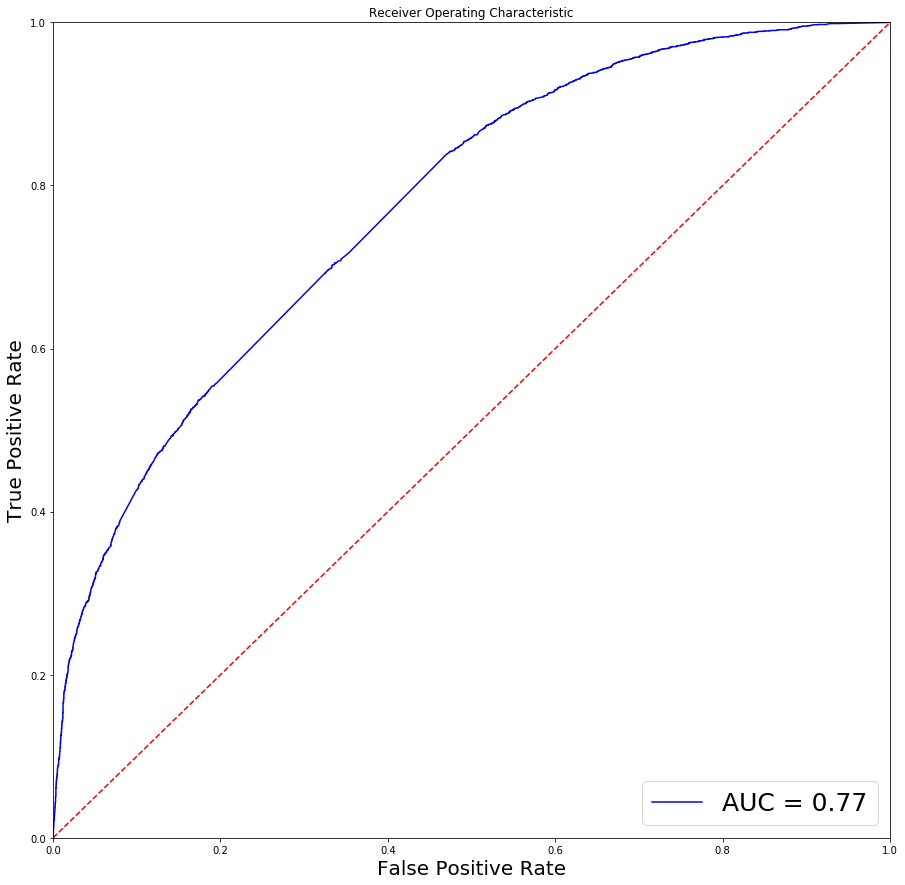

AttributeError: module 'pandas' has no attribute 'tslib'

In [34]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

preds = ypred
fpr, tpr, threshold = metrics.roc_curve(np.array(y_test),np.array(ypred) )
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right',prop={'size': 25})
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=20)
plt.savefig('Viz/Roc.png',)
plt.show()

# method II: ggplot
from ggplot import *
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [ ]:
y_test

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import pandas as pd
 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#instantiate CountVectorizer()
cv=CountVectorizer()
 
# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(new_X)

In [ ]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

In [ ]:

# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights']).head(10)

In [ ]:
count_vector=cv.transform(new_X)
# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [ ]:
feature_names = cv.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=tf_idf_vector
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False).head(10)

In [ ]:
common_phrases = []
for emp in employee_df['email_id']:
    emp_emails = list(emails_df[emails_df['sender']==emp]['token_subject'])
    list_l = []
    str_x = ' '
    for x in emp_emails:
        
        for item in x:
            str_x += str(item)
            str_x += ' '
        #list_l.append(str_x)
        list_l = [str_x]
    word_count_vector_emp =cv.transform(list_l)
    tf_idf_vector =tfidf_transformer.transform(word_count_vector_emp)
    
    df = pd.DataFrame(tf_idf_vector.T.todense(), index=feature_names, columns=["tfidf"])
    common_phrases.append(list(df.sort_values(by=["tfidf"],ascending=False).head(10).index))
employee_df['key_words'] = common_phrases
    

In [ ]:
feature_names = cv.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=tf_idf_vector[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
list(df.sort_values(by=["tfidf"],ascending=False).head(10).index)

In [ ]:
employee_df.to_csv('Data/employee_keywords')

In [ ]:
employee_df = pd.read_csv('Data/employee_keywords.csv')

In [ ]:
list(employee_df['key_words'])[0]

In [ ]:
emails_df['cleaned_body'] = [str(x) for x in emails_df['cleaned_body']]
[' love ' in x for x in emails_df['body']]

In [35]:
exec_subjects

[['fw', 'meeting'],
 ['ca', 'supply', 'realities'],
 ['today',
  'iso',
  'filings',
  'response',
  'ferc',
  'staff',
  'mitigation',
  'plan'],
 ['enron', 'pipeline', 'comments', 'el01-47'],
 ['final', 'script', 'eott', 'conference', 'call'],
 ['goodwill', 'presentation', 'exposure', 'draft', 'fyi'],
 ['job', 'function', 'list'],
 ['pre-tax', 'return'],
 ['fw', 'deal', 'sum', 'ecoutlook'],
 ['fw', 'analysis', 'years', '1996', '1997', '1998', '1999', '2000'],
 ['fw', 'trans', 'pecos'],
 ['presentation'],
 ['fw', 'board', 'presentation'],
 ['fw', 'tw', 'presentation'],
 ['fw', 'tw', 'capacity', '--', 'drag', 'reducer'],
 ['fyi', 'tw', 'expansion', 'overhead', 'rate'],
 ['eamr', 'interconnect', 'measurement', 'services'],
 ['ets', 'group', 'new', 'formation'],
 ['five', 'day', 'rolling', 'forecast'],
 ['five', 'day', 'rolling', 'forecast'],
 ['nng/dynegy', 'due', 'diligence'],
 ['data', 'room'],
 ['fw', 'data', 'room'],
 ['fw', 'data', 'room'],
 ['fw', 'capex'],
 ['nng', 'revenue', 'ba

In [39]:
X = employee_subjects
new_X = []
for x in X:
    str_x = ''
    for item in x:
        str_x = str_x + ' ' + item
    new_X.append(str_x)
X = new_X

In [40]:
list(X)

[' calpx et compliance unit submits 2nd annual report ferc',
 ' governor press conference -- shot across bow',
 ' ca iso cal px information related 2000 et activity',
 ' critics seek control iso',
 ' deregulation conspiracy incompetence even energy prices manipulated illegal gov calls cut electricity',
 ' iso special 8.10.00 report energy et issues performance -june 2000',
 ' st confidentiality agreement',
 ' ameramex bloomfield energy farm project trigon-sheehan information request',
 ' red lake storage project',
 ' wspp 4th quarter 2000 report',
 ' ferc doe 4th quarter reports',
 ' ferc doe 4th quarter reports',
 ' fwd california march 9 order addressing refunds jan. 2001 sales',
 ' wacm transmission losses',
 ' confirming already knew',
 ' iep ferc/iso draft iep ferc cmts staff report',
 ' ridgewood petition released qf contracts',
 ' fyi px sues iso',
 ' esc rto',
 ' nothing',
 ' capacity subscription strategy',
 ' cal throughput.xls',
 ' california proposed projects',
 ' spreadshe